# Descriptive Analysis ##2

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,Expense (% of GDP),uhc_index,uhc_available_score,access_drinkwater_index,access_sani_index,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,NaN,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
1,1,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,NaN,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
2,2,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,NaN,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
3,3,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,NaN,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
4,4,AGO,1990,12264.0,17229.0,23733.0,12264.0,17229.0,23733.0,8904.0,...,NaN,NaN,NaN,NaN,NaN,53226.0,6720.0,49866.0,49866.0,53226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46467,46467,TGO,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.560981,9.134181,NaN,NaN,NaN,NaN,NaN
46468,46468,UGA,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.647906,0.000000,NaN,NaN,NaN,NaN,NaN
46469,46469,ZAF,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
46470,46470,ZMB,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [22]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_dah_total_aid'].isnull().values.any())
print(data_analysis['best'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['Expense (% of GDP)'].isnull().values.any())
print(data_analysis['uhc_index'].isnull().values.any())
print(data_analysis['uhc_available_score'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [18]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46472 entries, 0 to 46471
Data columns (total 51 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   46472 non-null  object 
 1   year_id                                                                                                               46472 non-null  int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  32552 non-null  float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  32552 non-null  float64
 4   daly

## dependent variable

In [23]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())

count    32552.000000
mean     20311.916319
std      13928.482391
min        915.000000
25%      10974.000000
50%      16086.000000
75%      24666.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 46472 entries, 0 to 46471
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
32552 non-null  float64
dtypes: float64(1)
memory usage: 363.2 KB
None


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


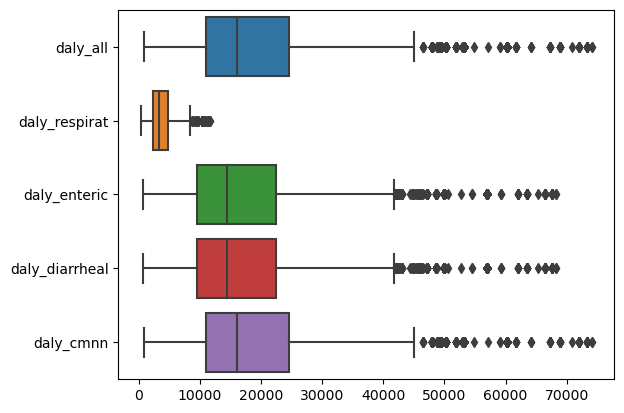

In [33]:
sns.boxplot(data=data_analysis[["daly_all", "daly_respirat",'daly_enteric','daly_diarrheal','daly_cmnn']], orient="h")
plt.savefig('daly_causes_boxplot.png')

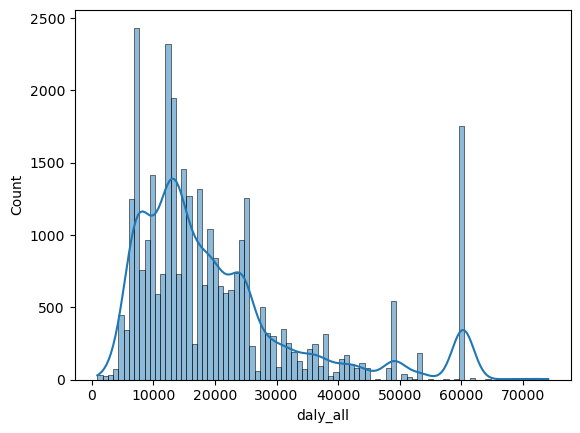

In [31]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [35]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

SkewtestResult(statistic=83.89968245096779, pvalue=0.0)

In [ ]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [37]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strangee since it sshould be complete, its estimates

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,daly_mean_All causes_No access to handwashing ...,29.953520
3,daly_mean_All causes_Unsafe sanitation_btsx_Al...,29.953520
4,daly_mean_All causes_Unsafe water source_btsx_...,29.953520
5,"daly_mean_Communicable, maternal, neonatal, an...",29.953520
6,"daly_mean_Communicable, maternal, neonatal, an...",29.953520
7,"daly_mean_Communicable, maternal, neonatal, an...",29.953520
8,daly_mean_Diarrheal diseases_No access to hand...,29.953520
9,daly_mean_Diarrheal diseases_Unsafe sanitation...,29.953520


In [ ]:
#what to do with missing data? balanced/ unbalanced panel?


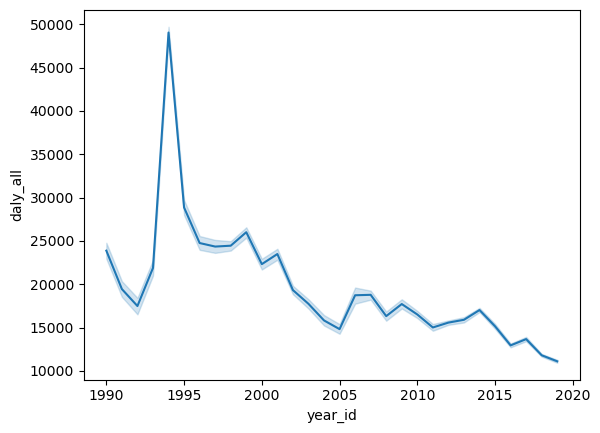

In [36]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.savefig('daly_all_timetrend.png')

In [ ]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

In [20]:
data_analysis['best'].describe()

count    45690.000000
mean        28.209061
std        504.496824
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      48183.000000
Name: best, dtype: float64

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

#what does the distribution say? --> log transform the variable

In [ ]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

In [ ]:
#compare logtransformed with non logtransfomed variables
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['best'],ax=axes[0])
sns.histplot(data_analysis['best_log'],ax=axes[1])

plt.savefig('conflict_log.png')

In [ ]:
#insepct the conflict lags


## controls package standard

In [ ]:
#get descriptives
data_analysis['best'].describe()
data_analysis['best'].describe()
data_analysis['best'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

#gdp has already been logtransformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

## controls package health

In [ ]:
#get descriptives
data_analysis['best'].describe()
data_analysis['best'].describe()
data_analysis['best'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')
##dah has already been log transformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

## controls package disaster

In [ ]:
#get descriptives
data_analysis['best'].describe()
data_analysis['best'].describe()
data_analysis['best'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'],kde = True)
plt.savefig('daly_all_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

# Start the statistical analysis in python

In [ ]:
import statsmodels

In [ ]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='col1',y='col2',data= df,scatter=False,fit_reg=True)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='col1',y='col2',data= df,scatter=True,fit_reg=False)

In [ ]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data['daly_all'], 
                y=data['best']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [ ]:
#the country fixed effects model
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
mod = PanelOLS(data1.daly_all, data1.best, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)